In [3]:
import pandas as pd
import numpy as np


In [4]:
Loan=pd.read_csv('/content/Loan.csv')
Loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
Loan['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

Locating outliers in applicantIncome column


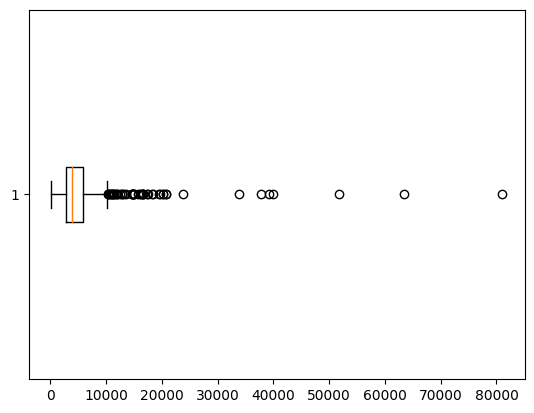

In [6]:
import matplotlib.pyplot as plt
plt.boxplot(Loan['ApplicantIncome'],vert=False)
plt.show()

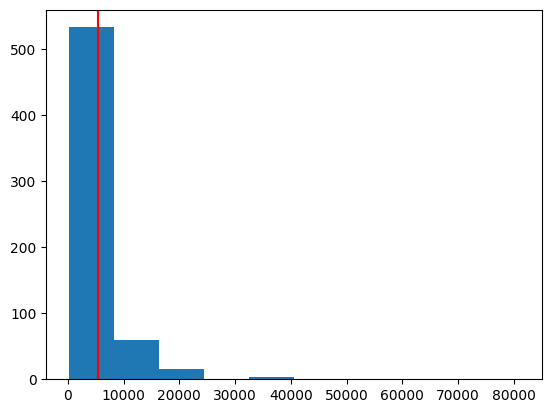

In [7]:
plt.hist(Loan['ApplicantIncome'])
plt.axvline(Loan['ApplicantIncome'].mean(),color='red')
plt.show()

<ipython-input-8-fd0eb832473c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Loan['ApplicantIncome'].dropna())


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

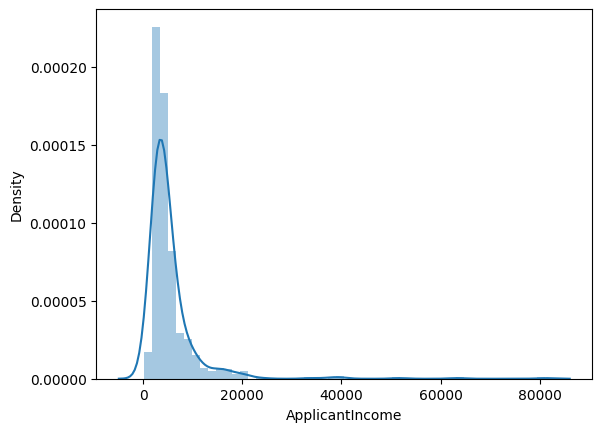

In [8]:
import seaborn as sns
sns.distplot(Loan['ApplicantIncome'].dropna())

In [9]:
#hence data is right skewed so
'''Interquartile Range(IQR) = Q3(75th percentile) -Q1(25th percentile)

The formula for the outlier boundary can be calculated as:

Lower Boundary= First Quartile(Q1/25th percentile) — (1.5 * IQR)

Upper Boundary = Third Quartile(Q3/75th percentile) +(1.5* IQR)'''
#finding lower and upper bound
IQR=Loan['ApplicantIncome'].quantile(0.75)-Loan['ApplicantIncome'].quantile(0.25)
lower_boundary=2877.5000-(1.5*IQR)
upper_boundary=5795.000+(1.5*IQR)
print("lower_boundary",lower_boundary)
print("upper_boundary",upper_boundary)

lower_boundary -1498.75
upper_boundary 10171.25


In [10]:
'''If the outlier’s maximum value is extremely high in comparison to the upper boundary, the boundary of outliers '''
'''Lower Boundary= First Quartile(Q1/25th percentile) — (3 * IQR)

Upper Boundary = Third Quartile(Q3/75th percentile) +(3 * IQR)'''
lower_boundary_1=2877.5-(3*IQR)
Upper_boundary_1=5795.0+(3*IQR)
print("lower_boundary",lower_boundary_1)
print("upper_boundary",Upper_boundary_1)

lower_boundary -5875.0
upper_boundary 14547.5


hence any values more than upper_boundary or less than lower_boundary will be considered as outlier

after detecting the outliers we are left with two major option to deal with outliers ...
1.Remove the outlier--- not good for small datasets
2.Imputation ---impute the outlier, to avoid data loss 
while imputing we can use mean,median or boundary values


In [11]:
#since lower boundary value is negative we need not to consider it 
Loan.loc[Loan['ApplicantIncome']>=14547.5]=14547.5

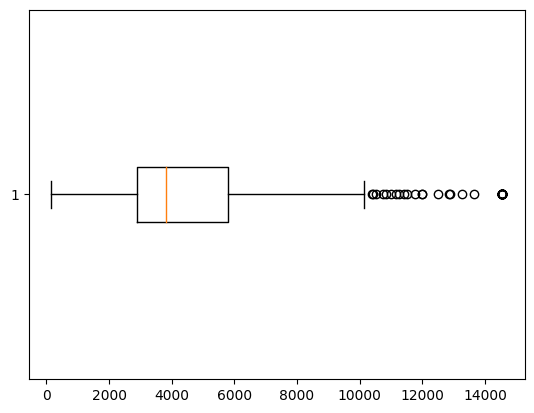

In [12]:
plt.boxplot(Loan['ApplicantIncome'],vert=False)
plt.show()

<ipython-input-13-5268815af068>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Loan['ApplicantIncome'].dropna())


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

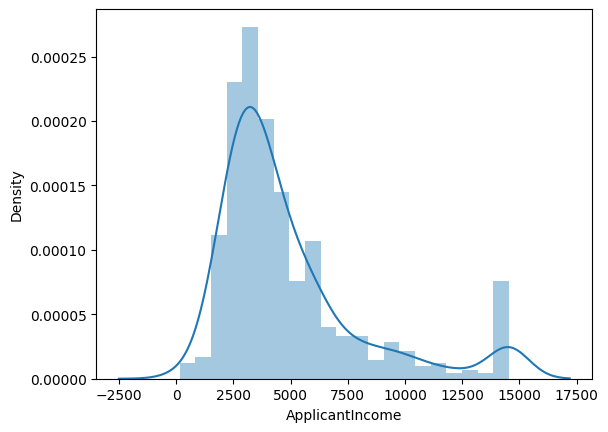

In [13]:
sns.distplot(Loan['ApplicantIncome'].dropna())